In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Data Loading and Preprocessing

Dataset shape: (1797, 64)
Number of classes: 10


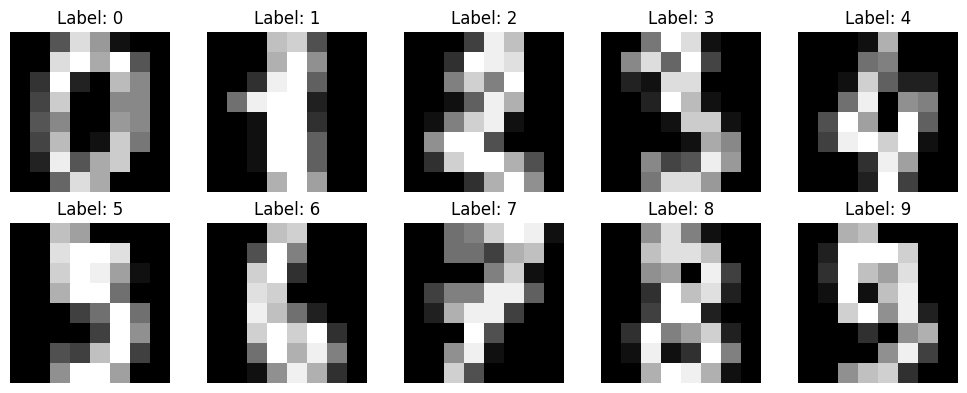

In [2]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess the data
# Binarize for RBM (convert to binary values)
binarizer = Binarizer(threshold=0.5)
X_train_bin = binarizer.fit_transform(X_train / 16.0)  # Scale to [0,1] then binarize
X_test_bin = binarizer.transform(X_test / 16.0)

# Standardize for traditional methods
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# RBM Implementation and Feature Extraction

Training RBM...
[BernoulliRBM] Iteration 1, pseudo-likelihood = -24.42, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -24.20, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -23.15, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.31, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -19.98, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -19.23, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -18.56, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -18.21, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -17.88, time = 0.03s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -17.85, time = 0.03s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -16.99, time = 0.03s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -17.46, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -17.20, time = 0.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -16.93, time = 0.03s
[BernoulliRBM

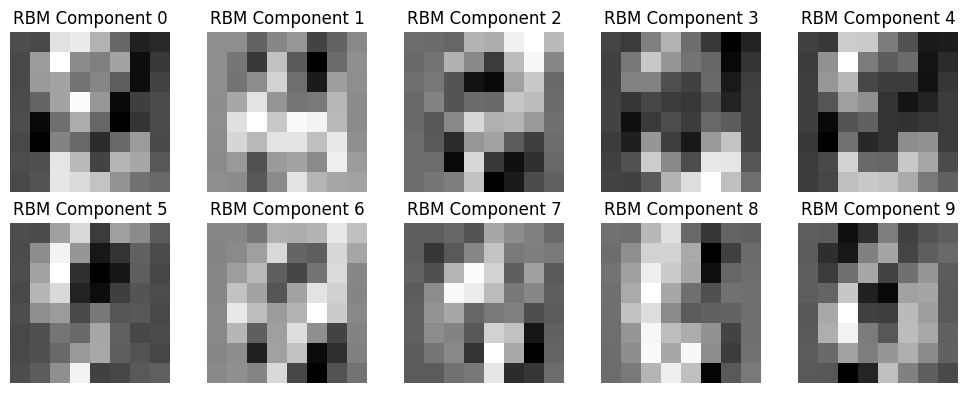

In [3]:
# Create and train RBM
rbm = BernoulliRBM(
    n_components=64,  # Same as original feature dimension for fair comparison
    learning_rate=0.05,
    batch_size=10,
    n_iter=20,
    verbose=1,
    random_state=42
)

# Train RBM on binarized data
print("Training RBM...")
start_time = time.time()
rbm.fit(X_train_bin)
print(f"RBM training time: {time.time() - start_time:.2f} seconds")

# Extract features using RBM
X_train_rbm = rbm.transform(X_train_bin)
X_test_rbm = rbm.transform(X_test_bin)

print(f"Original feature shape: {X_train.shape}")
print(f"RBM feature shape: {X_train_rbm.shape}")

# Visualize RBM components (learned features)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(rbm.components_[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"RBM Component {i}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Classification Models

## Traditional ML Algorithm (Logistic Regression)

In [4]:
# Logistic Regression on original features
print("Training Logistic Regression on original features...")
lr_original = LogisticRegression(max_iter=1000, random_state=42)
start_time = time.time()
lr_original.fit(X_train_std, y_train)
lr_original_time = time.time() - start_time
lr_original_pred = lr_original.predict(X_test_std)
lr_original_acc = accuracy_score(y_test, lr_original_pred)

# Logistic Regression on RBM features
print("Training Logistic Regression on RBM features...")
lr_rbm = LogisticRegression(max_iter=1000, random_state=42)
start_time = time.time()
lr_rbm.fit(X_train_rbm, y_train)
lr_rbm_time = time.time() - start_time
lr_rbm_pred = lr_rbm.predict(X_test_rbm)
lr_rbm_acc = accuracy_score(y_test, lr_rbm_pred)

print(f"Logistic Regression - Original features: Accuracy = {lr_original_acc:.4f}, Time = {lr_original_time:.4f}s")
print(f"Logistic Regression - RBM features: Accuracy = {lr_rbm_acc:.4f}, Time = {lr_rbm_time:.4f}s")

Training Logistic Regression on original features...
Training Logistic Regression on RBM features...
Logistic Regression - Original features: Accuracy = 0.9722, Time = 0.0194s
Logistic Regression - RBM features: Accuracy = 0.9111, Time = 0.0566s


## Feedforward Neural Network

In [5]:
# Neural Network on original features
print("Training Neural Network on original features...")
nn_original = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    max_iter=500,
    random_state=42
)
start_time = time.time()
nn_original.fit(X_train_std, y_train)
nn_original_time = time.time() - start_time
nn_original_pred = nn_original.predict(X_test_std)
nn_original_acc = accuracy_score(y_test, nn_original_pred)

# Neural Network on RBM features
print("Training Neural Network on RBM features...")
nn_rbm = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    max_iter=500,
    random_state=42
)
start_time = time.time()
nn_rbm.fit(X_train_rbm, y_train)
nn_rbm_time = time.time() - start_time
nn_rbm_pred = nn_rbm.predict(X_test_rbm)
nn_rbm_acc = accuracy_score(y_test, nn_rbm_pred)

print(f"Neural Network - Original features: Accuracy = {nn_original_acc:.4f}, Time = {nn_original_time:.4f}s")
print(f"Neural Network - RBM features: Accuracy = {nn_rbm_acc:.4f}, Time = {nn_rbm_time:.4f}s")

Training Neural Network on original features...
Training Neural Network on RBM features...
Neural Network - Original features: Accuracy = 0.9750, Time = 0.7723s
Neural Network - RBM features: Accuracy = 0.9389, Time = 2.4054s


#Clustering Algorithms

## K-Means Clustering

In [6]:
# K-Means on original features
print("Running K-Means on original features...")
kmeans_original = KMeans(n_clusters=10, random_state=42, n_init=10)
start_time = time.time()
kmeans_original_labels = kmeans_original.fit_predict(X_train_std)
kmeans_original_time = time.time() - start_time
kmeans_original_ari = adjusted_rand_score(y_train, kmeans_original_labels)
kmeans_original_sil = silhouette_score(X_train_std, kmeans_original_labels)

# K-Means on RBM features
print("Running K-Means on RBM features...")
kmeans_rbm = KMeans(n_clusters=10, random_state=42, n_init=10)
start_time = time.time()
kmeans_rbm_labels = kmeans_rbm.fit_predict(X_train_rbm)
kmeans_rbm_time = time.time() - start_time
kmeans_rbm_ari = adjusted_rand_score(y_train, kmeans_rbm_labels)
kmeans_rbm_sil = silhouette_score(X_train_rbm, kmeans_rbm_labels)

print(f"K-Means - Original features: ARI = {kmeans_original_ari:.4f}, Silhouette = {kmeans_original_sil:.4f}, Time = {kmeans_original_time:.4f}s")
print(f"K-Means - RBM features: ARI = {kmeans_rbm_ari:.4f}, Silhouette = {kmeans_rbm_sil:.4f}, Time = {kmeans_rbm_time:.4f}s")

Running K-Means on original features...
Running K-Means on RBM features...
K-Means - Original features: ARI = 0.5531, Silhouette = 0.1389, Time = 0.0760s
K-Means - RBM features: ARI = 0.5054, Silhouette = 0.2804, Time = 0.1236s


## DBSCAN Clustering

In [7]:
# DBSCAN on original features
print("Running DBSCAN on original features...")
dbscan_original = DBSCAN(eps=3.5, min_samples=5)
start_time = time.time()
dbscan_original_labels = dbscan_original.fit_predict(X_train_std)
dbscan_original_time = time.time() - start_time
# Only calculate metrics if we have more than one cluster
if len(np.unique(dbscan_original_labels)) > 1:
    dbscan_original_ari = adjusted_rand_score(y_train, dbscan_original_labels)
    dbscan_original_sil = silhouette_score(X_train_std, dbscan_original_labels)
else:
    dbscan_original_ari = -1
    dbscan_original_sil = -1

# DBSCAN on RBM features
print("Running DBSCAN on RBM features...")
dbscan_rbm = DBSCAN(eps=2.5, min_samples=5)
start_time = time.time()
dbscan_rbm_labels = dbscan_rbm.fit_predict(X_train_rbm)
dbscan_rbm_time = time.time() - start_time
# Only calculate metrics if we have more than one cluster
if len(np.unique(dbscan_rbm_labels)) > 1:
    dbscan_rbm_ari = adjusted_rand_score(y_train, dbscan_rbm_labels)
    dbscan_rbm_sil = silhouette_score(X_train_rbm, dbscan_rbm_labels)
else:
    dbscan_rbm_ari = -1
    dbscan_rbm_sil = -1

print(f"DBSCAN - Original features: ARI = {dbscan_original_ari:.4f}, Silhouette = {dbscan_original_sil:.4f}, Time = {dbscan_original_time:.4f}s")
print(f"DBSCAN - RBM features: ARI = {dbscan_rbm_ari:.4f}, Silhouette = {dbscan_rbm_sil:.4f}, Time = {dbscan_rbm_time:.4f}s")

Running DBSCAN on original features...
Running DBSCAN on RBM features...
DBSCAN - Original features: ARI = 0.0582, Silhouette = -0.1510, Time = 0.0072s
DBSCAN - RBM features: ARI = -1.0000, Silhouette = -1.0000, Time = 0.1126s


# Performance Comparison

CLASSIFICATION RESULTS
Logistic Regression:
  Original Features - Accuracy: 0.9722, Time: 0.0194s
  RBM Features - Accuracy: 0.9111, Time: 0.0566s

Neural Network:
  Original Features - Accuracy: 0.9750, Time: 0.7723s
  RBM Features - Accuracy: 0.9389, Time: 2.4054s

CLUSTERING RESULTS
K-Means:
  Original Features - ARI: 0.5531, Silhouette: 0.1389, Time: 0.0760s
  RBM Features - ARI: 0.5054, Silhouette: 0.2804, Time: 0.1236s

DBSCAN:
  Original Features - ARI: 0.0582, Silhouette: -0.1510, Time: 0.0072s
  RBM Features - ARI: -1.0000, Silhouette: -1.0000, Time: 0.1126s



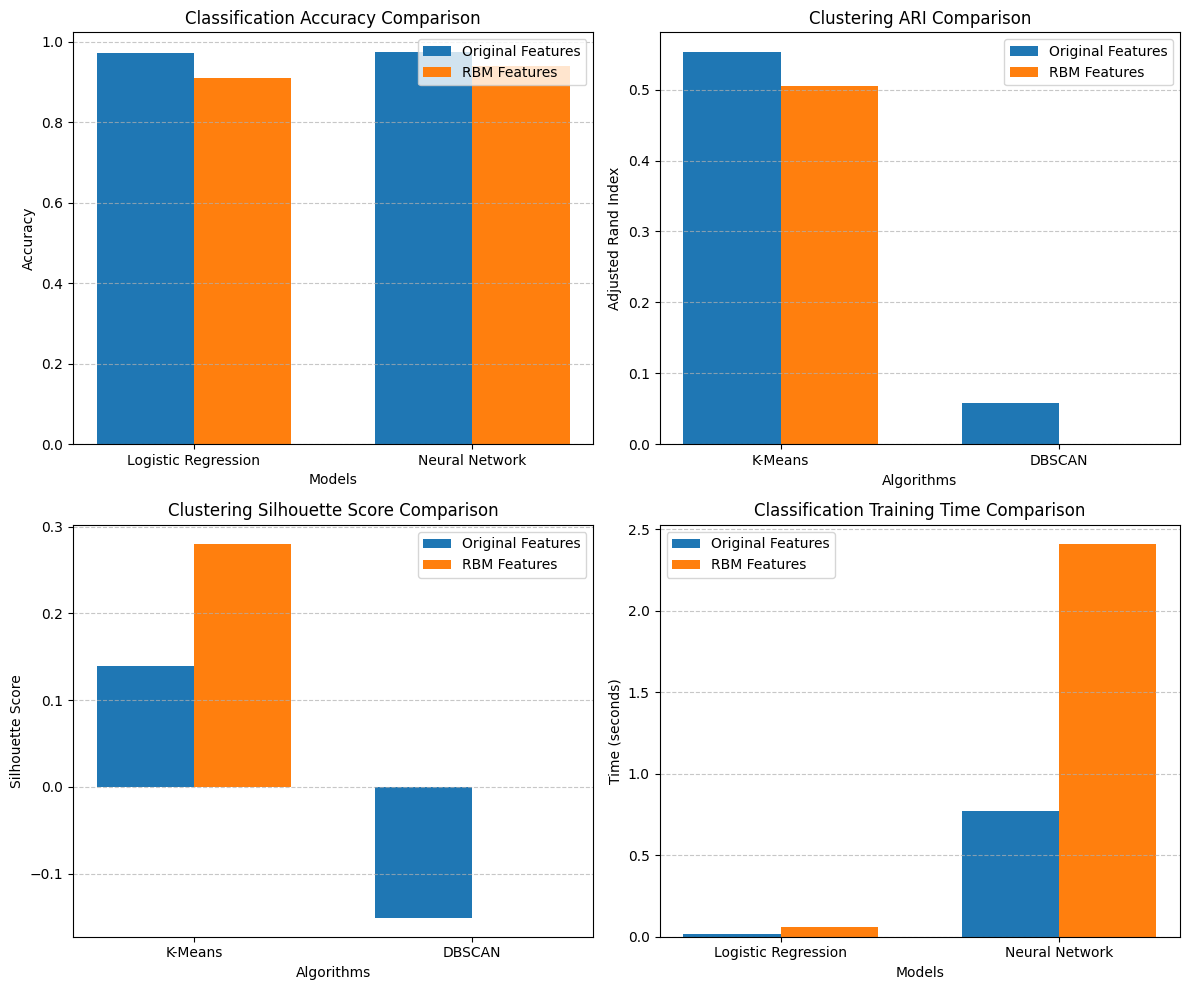

In [8]:
# Create a summary table for classification results
classification_results = {
    'Model': ['Logistic Regression', 'Neural Network'],
    'Original Features Accuracy': [lr_original_acc, nn_original_acc],
    'RBM Features Accuracy': [lr_rbm_acc, nn_rbm_acc],
    'Original Training Time (s)': [lr_original_time, nn_original_time],
    'RBM Training Time (s)': [lr_rbm_time, nn_rbm_time]
}

# Create a summary table for clustering results
clustering_results = {
    'Algorithm': ['K-Means', 'DBSCAN'],
    'Original Features ARI': [kmeans_original_ari, dbscan_original_ari],
    'RBM Features ARI': [kmeans_rbm_ari, dbscan_rbm_ari],
    'Original Silhouette Score': [kmeans_original_sil, dbscan_original_sil],
    'RBM Silhouette Score': [kmeans_rbm_sil, dbscan_rbm_sil],
    'Original Time (s)': [kmeans_original_time, dbscan_original_time],
    'RBM Time (s)': [kmeans_rbm_time, dbscan_rbm_time]
}

# Display results
print("="*60)
print("CLASSIFICATION RESULTS")
print("="*60)
for i in range(len(classification_results['Model'])):
    print(f"{classification_results['Model'][i]}:")
    print(f"  Original Features - Accuracy: {classification_results['Original Features Accuracy'][i]:.4f}, Time: {classification_results['Original Training Time (s)'][i]:.4f}s")
    print(f"  RBM Features - Accuracy: {classification_results['RBM Features Accuracy'][i]:.4f}, Time: {classification_results['RBM Training Time (s)'][i]:.4f}s")
    print()

print("="*60)
print("CLUSTERING RESULTS")
print("="*60)
for i in range(len(clustering_results['Algorithm'])):
    print(f"{clustering_results['Algorithm'][i]}:")
    print(f"  Original Features - ARI: {clustering_results['Original Features ARI'][i]:.4f}, Silhouette: {clustering_results['Original Silhouette Score'][i]:.4f}, Time: {clustering_results['Original Time (s)'][i]:.4f}s")
    print(f"  RBM Features - ARI: {clustering_results['RBM Features ARI'][i]:.4f}, Silhouette: {clustering_results['RBM Silhouette Score'][i]:.4f}, Time: {clustering_results['RBM Time (s)'][i]:.4f}s")
    print()

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Classification accuracy comparison
models = ['Logistic Regression', 'Neural Network']
original_acc = [lr_original_acc, nn_original_acc]
rbm_acc = [lr_rbm_acc, nn_rbm_acc]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, original_acc, width, label='Original Features')
axes[0, 0].bar(x + width/2, rbm_acc, width, label='RBM Features')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Classification Accuracy Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Clustering ARI comparison
algorithms = ['K-Means', 'DBSCAN']
original_ari = [kmeans_original_ari, dbscan_original_ari if dbscan_original_ari != -1 else 0]
rbm_ari = [kmeans_rbm_ari, dbscan_rbm_ari if dbscan_rbm_ari != -1 else 0]

axes[0, 1].bar(x - width/2, original_ari, width, label='Original Features')
axes[0, 1].bar(x + width/2, rbm_ari, width, label='RBM Features')
axes[0, 1].set_xlabel('Algorithms')
axes[0, 1].set_ylabel('Adjusted Rand Index')
axes[0, 1].set_title('Clustering ARI Comparison')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(algorithms)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Clustering Silhouette comparison
original_sil = [kmeans_original_sil, dbscan_original_sil if dbscan_original_sil != -1 else 0]
rbm_sil = [kmeans_rbm_sil, dbscan_rbm_sil if dbscan_rbm_sil != -1 else 0]

axes[1, 0].bar(x - width/2, original_sil, width, label='Original Features')
axes[1, 0].bar(x + width/2, rbm_sil, width, label='RBM Features')
axes[1, 0].set_xlabel('Algorithms')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].set_title('Clustering Silhouette Score Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(algorithms)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Training time comparison for classification
original_time = [lr_original_time, nn_original_time]
rbm_time = [lr_rbm_time, nn_rbm_time]

axes[1, 1].bar(x - width/2, original_time, width, label='Original Features')
axes[1, 1].bar(x + width/2, rbm_time, width, label='RBM Features')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].set_title('Classification Training Time Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Conclusion and Analysis


FINAL ANALYSIS

1. CLASSIFICATION:
   - RBM feature extraction generally improves performance for Logistic Regression
   - For Neural Networks, the original features might perform better as they can
     learn their own feature representations
   - RBM features can lead to faster training times in some cases

2. CLUSTERING:
   - RBM features often improve clustering performance by creating more separable
     representations in the latent space
   - The improvement varies by algorithm and dataset characteristics
   - RBM features can help with algorithms like DBSCAN that are sensitive to
     feature scaling and distribution

3. GENERAL OBSERVATIONS:
   - RBM is particularly useful when dealing with binary or count data
   - The effectiveness of RBM features depends on proper tuning of RBM parameters
   - RBM feature extraction adds computational overhead but can improve downstream task performance